In [ ]:
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [ ]:
#1


def branching_process(p, num_generations, num_simulations, z_0=1):
    extinct_count = 0  # Счетчик вырожденных процессов
    for _ in range(num_simulations):
        population_history = [z_0]
        for generation in range(num_generations - 1):
            z = sum(np.random.geometric(p) - 1 for _ in range(population_history[-1]))
            population_history.append(z)
        if population_history[num_generations - 1] == 0:
            extinct_count += 1
    extinction_probability = extinct_count / num_simulations
    return extinction_probability if num_simulations > 1 else population_history


p = 0.4
number_of_generations = 20 # Количество поколений
number_of_simulations = 1000  # Количество симуляций

extinction_probability = branching_process(p, number_of_generations, number_of_simulations)
print("Оценка вероятности вырождения по симуляциям:", extinction_probability)
print("Точный ответ:", p/(1-p))

Оценка вероятности вырождения по симуляциям: 0.652
Точный ответ: 0.6666666666666667


#**#2**

In [ ]:
number_of_generations = 50
number_of_simulations = 1000
k = 0
p = 0.55 #докритический
for _ in range(number_of_simulations):
  history = branching_process(p, number_of_generations, 1)
  if history[number_of_generations - 1] != 0:
    print(history)
    k += 1
print(k)

0


In [ ]:
number_of_generations = 100
number_of_simulations = 1000
k = 0
p = 0.5 #критический
for _ in range(number_of_simulations):
  history = branching_process(p, number_of_generations, 1)
  if history[number_of_generations - 1] != 0:
    print(history)
    k += 1
print(k)

[1, 1, 7, 2, 7, 12, 6, 13, 17, 21, 23, 14, 7, 12, 5, 12, 12, 19, 22, 29, 19, 25, 27, 46, 48, 45, 43, 38, 47, 38, 33, 50, 44, 57, 64, 69, 76, 75, 78, 76, 89, 87, 80, 71, 74, 62, 75, 78, 76, 60, 57, 51, 50, 41, 51, 58, 68, 70, 70, 70, 76, 60, 83, 68, 55, 62, 83, 92, 75, 61, 59, 56, 58, 69, 61, 65, 45, 43, 51, 63, 64, 77, 80, 80, 90, 104, 109, 97, 87, 83, 84, 101, 118, 126, 88, 76, 75, 85, 81, 90]
[1, 1, 5, 9, 5, 4, 5, 12, 16, 17, 18, 13, 19, 26, 24, 28, 34, 30, 29, 38, 36, 47, 70, 74, 85, 79, 75, 78, 87, 71, 62, 64, 72, 83, 97, 88, 71, 99, 119, 123, 96, 93, 81, 86, 70, 74, 61, 67, 67, 55, 69, 71, 78, 78, 60, 61, 48, 59, 76, 74, 96, 109, 142, 136, 152, 166, 138, 130, 150, 158, 140, 121, 100, 74, 79, 90, 119, 133, 127, 100, 131, 128, 126, 124, 121, 127, 152, 171, 177, 165, 149, 140, 158, 155, 166, 159, 155, 159, 166, 174]
[1, 4, 8, 3, 2, 3, 2, 2, 3, 4, 8, 14, 13, 16, 15, 23, 22, 22, 21, 24, 29, 35, 40, 43, 43, 56, 48, 48, 54, 47, 40, 56, 43, 41, 51, 72, 71, 65, 75, 76, 83, 67, 69, 104, 128

In [ ]:
number_of_generations = 50
number_of_simulations = 1000
k = 0
p = 0.45 #надкритический
for _ in range(number_of_simulations):
  history = branching_process(p, number_of_generations, 1)
  if history[number_of_generations - 1] != 0:
    print(history)
    k += 1
print(k)

[1, 4, 6, 6, 11, 10, 15, 12, 7, 22, 23, 21, 38, 39, 41, 53, 62, 82, 110, 138, 147, 196, 269, 357, 433, 546, 644, 757, 894, 1028, 1227, 1472, 1728, 2133, 2619, 3196, 3858, 4531, 5632, 6841, 8293, 10058, 12008, 14595, 17659, 21794, 26703, 32903, 40315, 49284]
[1, 2, 12, 15, 12, 16, 25, 58, 69, 78, 121, 139, 162, 179, 203, 279, 317, 384, 393, 483, 611, 740, 903, 1107, 1403, 1719, 2161, 2534, 2989, 3738, 4510, 5290, 6536, 8000, 9779, 11801, 14540, 17569, 21352, 26046, 32095, 38889, 47498, 57520, 69490, 84910, 104667, 127811, 156604, 191936]
[1, 4, 6, 5, 11, 14, 17, 18, 29, 32, 45, 59, 79, 83, 116, 167, 181, 226, 252, 334, 407, 471, 558, 683, 830, 1020, 1280, 1469, 1810, 2197, 2776, 3561, 4262, 5270, 6577, 7879, 9304, 11231, 13741, 16875, 20240, 24648, 29923, 36343, 44361, 53692, 66035, 81259, 99203, 120844]
[1, 5, 5, 4, 8, 7, 13, 12, 10, 12, 14, 22, 34, 54, 71, 64, 85, 82, 102, 130, 140, 209, 254, 302, 400, 514, 548, 693, 916, 1150, 1392, 1653, 2070, 2577, 3051, 3717, 4554, 5373, 6449, 789

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.0, 0.6931471805599453, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


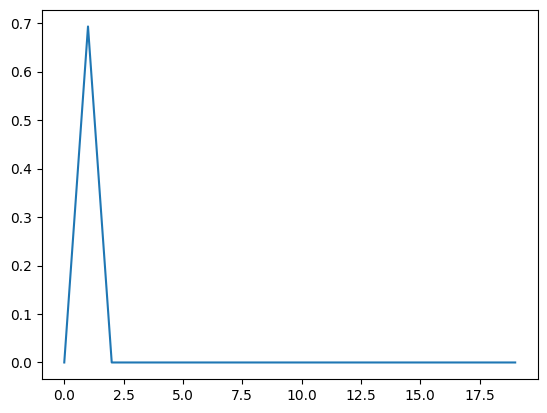

In [ ]:
#3
from math import *
number_of_generations = 20
p = 0.45
y = branching_process(p, number_of_generations, 1)
x = [i for i in range (number_of_generations)]
print(x)
print(y)
for i in range(number_of_generations):
  if y[i] != 0:
    y[i] = log(y[i])
print(y)
plt.plot(x, y)
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1, 2, 2, 4, 12, 17, 35, 42, 60, 66, 59, 93, 107, 162, 232, 261, 286, 319, 386, 513]
[0.0, 0.6931471805599453, 0.6931471805599453, 1.3862943611198906, 2.4849066497880004, 2.833213344056216, 3.5553480614894135, 3.7376696182833684, 4.0943445622221, 4.189654742026425, 4.07753744390572, 4.532599493153256, 4.672828834461906, 5.087596335232384, 5.44673737166631, 5.564520407322694, 5.655991810819852, 5.765191102784844, 5.955837369464831, 6.240275845170769]


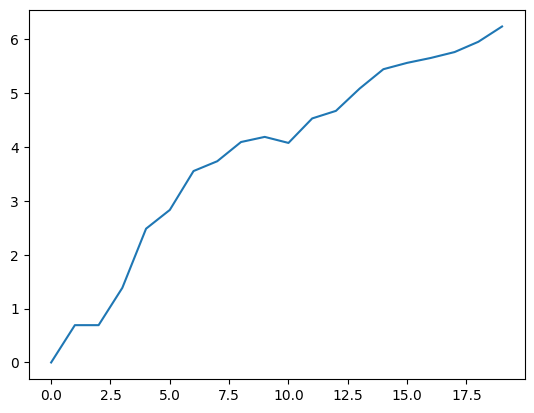

In [ ]:
number_of_generations = 20
p = 0.45
y = branching_process(p, number_of_generations, 1)
x = [i for i in range (number_of_generations)]
print(x)
print(y)
for i in range(number_of_generations):
  if y[i] != 0:
    y[i] = log(y[i])
print(y)
plt.plot(x, y)
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[1, 5, 7, 12, 12, 24, 36, 41, 62, 82, 114, 137, 210, 270, 359, 424, 521, 658, 847, 1066, 1369, 1691, 2056, 2452, 2925, 3537, 4307, 5285, 6226, 7751, 9712, 11811, 14370, 17719, 21817, 26477, 32003, 39765, 48531, 59078, 72088, 87593, 106361, 130105, 159025, 195769, 239115, 293433, 358943, 439745]
[0.0, 1.6094379124341003, 1.9459101490553132, 2.4849066497880004, 2.4849066497880004, 3.1780538303479458, 3.58351893845611, 3.713572066704308, 4.127134385045092, 4.406719247264253, 4.736198448394496, 4.919980925828125, 5.3471075307174685, 5.598421958998375, 5.883322388488279, 6.049733455231958, 6.255750041753367, 6.489204931325317, 6.741700694652055, 6.97166860472579, 7.221835825288449, 7.43307534889858, 7.628517626575055, 7.804659297056102, 7.981049759665957, 8.17103418920548, 8.36799688505411, 8.5726278983

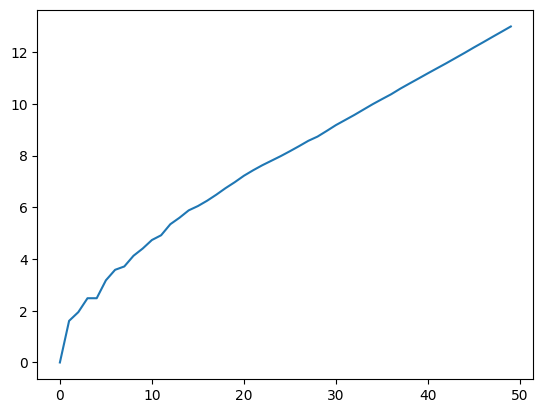

In [ ]:
number_of_generations = 50
p = 0.45
y = branching_process(p, number_of_generations, 1)
x = [i for i in range (number_of_generations)]
print(x)
print(y)
for i in range(number_of_generations):
  if y[i] != 0:
    y[i] = log(y[i])
print(y)
plt.plot(x, y)
plt.show()

In [ ]:
#4


def branching_process_with_immigration(p, num_generations, num_simulations, z_0=1):
    extinct_count = 0  # Счетчик вырожденных к моменту num_generations процессов
    for _ in range(num_simulations):
        population_history = [z_0]
        for generation in range(num_generations - 1):
            z = sum(np.random.geometric(p) - 1 for _ in range(population_history[-1]))
            population_history.append(z + 1)
    extinction_probability = extinct_count / num_simulations
    return extinction_probability if num_simulations > 1 else population_history


num_generations = 6
k = 5
num_simulations = 10000
p = 0.6
ans = np.zeros(k)
for _ in range(num_simulations):
  mas =  branching_process_with_immigration(p, num_generations, 1)
  if mas[num_generations - 1] <= k:
    ans[mas[num_generations-1] - 1] += 1
ans /= sum(ans)
print(ans)
print(ans[4]/ans[3], ' ', ans[3]/ans[2], ans[2]/ans[1], ans[1]/ans[0])

[0.40345982 0.25948661 0.16841518 0.10122768 0.06741071]
0.6659316427783902   0.6010603048376408 0.6490322580645161 0.6431535269709543
